# ***Classificação de adimplência ou inadimplência***[](http://)

Temos uma tabela com dados de clientes de uma instituição financeira no formato CSV, é queremos identificar quais desses clientes são adimplentes ou inadimplentes.Para isso vamos usar a segunda coluna, chamada ***default***, que indica se um cliente é adimplente**(default = 0)** ou inadimplente**(default = 1)** é se fatores como seu trabalho, escolaridade ou movimentações financeiras, influenciam nisso.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
credito = pd.read_csv('/kaggle/input/public/credito.csv')
credito.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


## Exploração de Dados

In [3]:
credito.shape

(10127, 16)

In [4]:
credito[credito['default'] == 0].shape

(8500, 16)

In [5]:
credito[credito['default'] == 1].shape

(1627, 16)

In [6]:
qtd_total, _ = credito.shape
qtd_adimplentes, _ = credito[credito['default'] == 0].shape
qtd_inadimplentes, _ = credito[credito['default'] == 1].shape

In [7]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


In [8]:
credito.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [9]:
credito.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [10]:
credito.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [11]:
credito.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [12]:
credito.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [13]:
def stats_dados_faltantes(credito: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in credito.columns:
    if credito[col].isna().any():
      qtd, _ = credito[credito[col].isna()].shape
      total, _ = credito.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [14]:
stats_dados_faltantes(credito=credito)

In [15]:
stats_dados_faltantes(credito=credito[credito['default'] == 0])

In [16]:
stats_dados_faltantes(credito=credito[credito['default'] == 1])

## Transformação e limpeza de dados

In [17]:
credito[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [18]:
credito[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [19]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


In [20]:
credito.dropna(inplace=True)

In [21]:
credito.shape

(10127, 16)

In [22]:
credito[credito['default'] == 0].shape

(8500, 16)

In [23]:
credito[credito['default'] == 1].shape

(1627, 16)

In [24]:
qtd_total_novo, _ = credito.shape
qtd_adimplentes_novo, _ = credito[credito['default'] == 0].shape
qtd_inadimplentes_novo, _ = credito[credito['default'] == 1].shape

In [25]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 83.93%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 16.07%


## Visualização de dados

In [26]:
sns.set_style("whitegrid")

In [27]:
credito_adimplente = credito[credito['default'] == 0]

In [33]:
credito_inadimplente = credito[credito['default'] == 1]

In [28]:
credito.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao,limite_credito,valor_transacoes_12m
0,M,ensino medio,casado,$60K - $80K,blue,"12.691,51","1.144,90"
1,F,mestrado,solteiro,menos que $40K,blue,"8.256,96","1.291,45"
2,M,mestrado,casado,$80K - $120K,blue,"3.418,56","1.887,72"
3,F,ensino medio,na,menos que $40K,blue,"3.313,03","1.171,56"
4,M,sem educacao formal,casado,$60K - $80K,blue,"4.716,22","816,08"


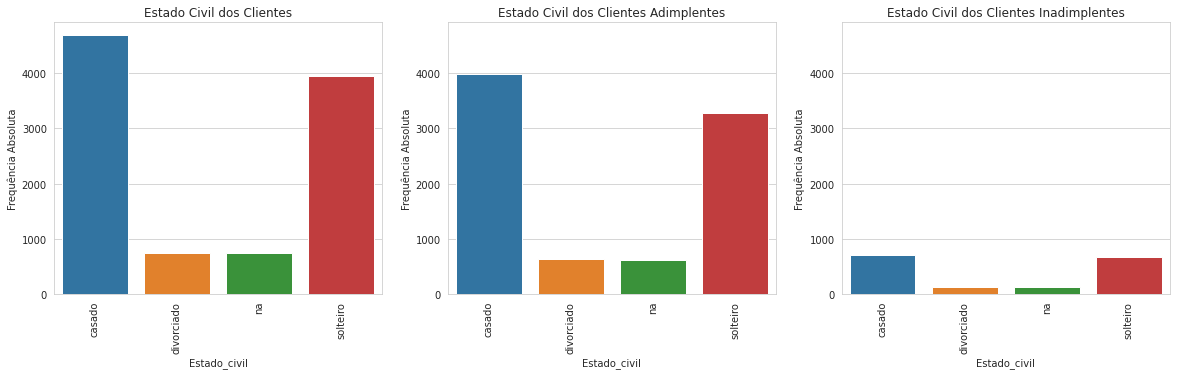

In [34]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = credito.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [credito, credito_adimplente, credito_inadimplente]:

  credito_to_plot = dataframe[coluna].value_counts().to_frame()
  credito_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  credito_to_plot[coluna] = credito_to_plot.index
  credito_to_plot.sort_values(by=[coluna], inplace=True)
  credito_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=credito_to_plot[coluna], y=credito_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

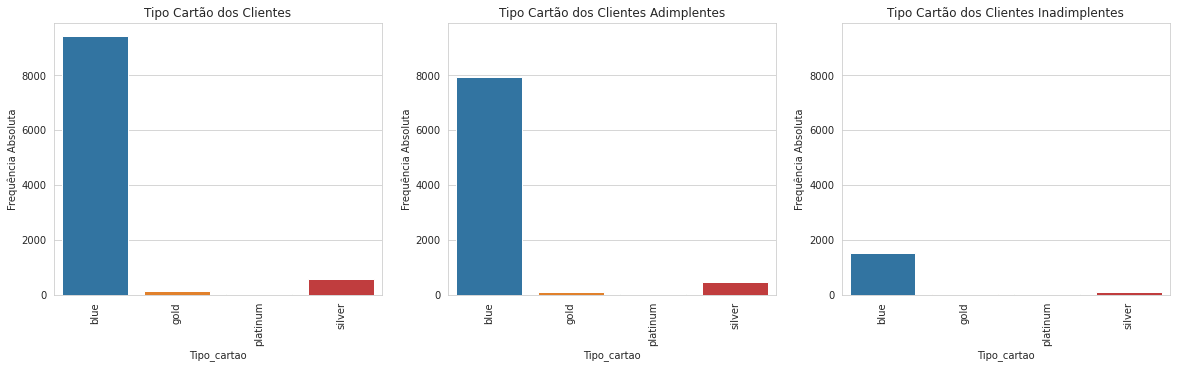

In [35]:
coluna = 'tipo_cartao'
titulos = ['Tipo Cartão dos Clientes', 'Tipo Cartão dos Clientes Adimplentes', 'Tipo Cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = credito.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [credito, credito_adimplente, credito_inadimplente]:

  credito_to_plot = dataframe[coluna].value_counts().to_frame()
  credito_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  credito_to_plot[coluna] = credito_to_plot.index
  credito_to_plot.sort_values(by=[coluna], inplace=True)
  credito_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=credito_to_plot[coluna], y=credito_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()